[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 77.50%
              precision    recall  f1-score   support

           0       0.69      0.87      0.77        86
           1       0.88      0.70      0.78       114

    accuracy                           0.78       200
   macro avg       0.78      0.79      0.77       200
weighted avg       0.80      0.78      0.78       200



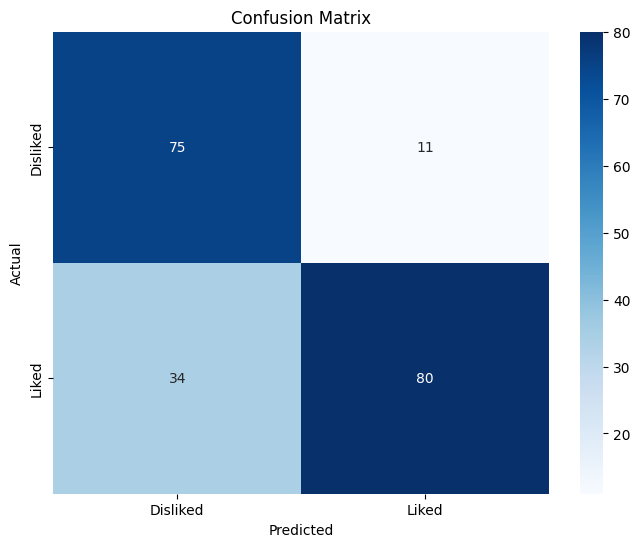

<ipython-input-3-ed7780404f88>:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')


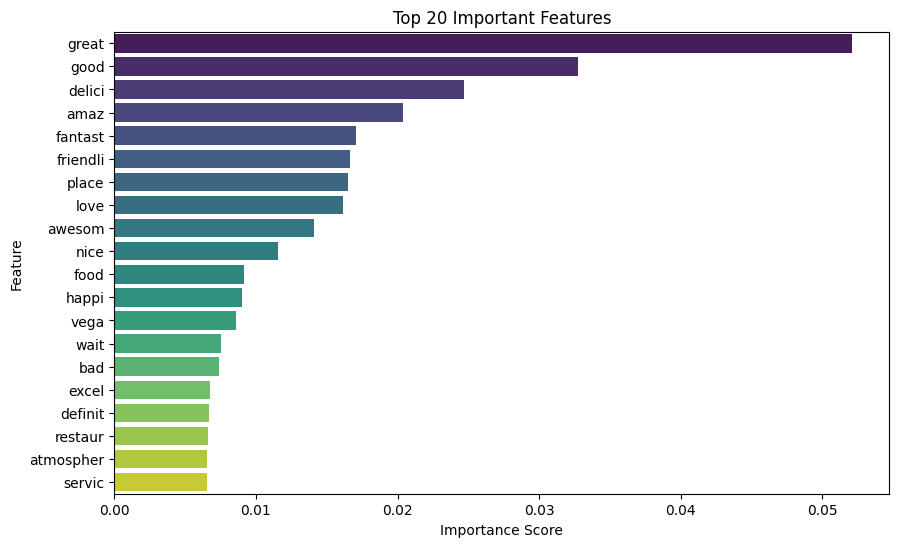

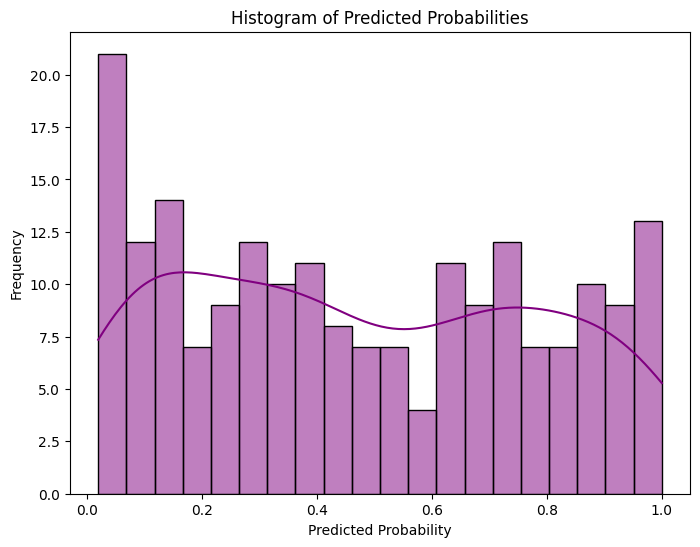

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk

# Download NLTK data
nltk.download('stopwords')

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/sentiment_analysis/Restaurant_Reviews.csv')  # Replace with your dataset file

# Preprocess the data using a custom preprocessing pipeline
corpus = []
ps = PorterStemmer()

for i in range(len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['Review'][i])  # Keep only letters
    review = review.lower()  # Convert to lowercase
    review_word = review.split()  # Tokenize
    review_word = [word for word in review_word if word not in set(stopwords.words('english'))]  # Remove stopwords
    review_word = [ps.stem(word) for word in review_word]  # Apply stemming
    review = ' '.join(review_word)  # Reconstruct the cleaned text
    corpus.append(review)

# Prepare labels
labels = df['Liked'].values  # Assuming labels are binary (0 or 1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(corpus, labels, test_size=0.2, random_state=142)

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1500, stop_words='english', ngram_range=(1, 2))

# Transform the preprocessed text data into TF-IDF features
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_test).toarray()

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Disliked', 'Liked'], yticklabels=['Disliked', 'Liked'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature importance visualization
feature_importances = rf_classifier.feature_importances_
features = tfidf_vectorizer.get_feature_names_out()

# Create a DataFrame for feature importances
feature_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False).head(20)  # Top 20 features

# Bar chart for feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')
plt.title('Top 20 Important Features')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# Histogram of predicted probabilities
y_probs = rf_classifier.predict_proba(X_test_tfidf)[:, 1]  # Probabilities for the positive class
plt.figure(figsize=(8, 6))
sns.histplot(y_probs, kde=True, bins=20, color='purple')
plt.title('Histogram of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()

# X.shape
# X[0]
# X[0].max()

import numpy as np
rows_to_add = 1000 - X.shape[0]
last_row = X[-1].reshape(1, -1)
additional_rows = np.tile(last_row, (rows_to_add, 1))
X = np.vstack([X, additional_rows])
# print(f"New shape of X: {X.shape}")

y=df.iloc[:,-1].values
# y.shape
# print(f"Shape of X: {X.shape}")
# print(f"Length of y: {len(y)}")

from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()

# X.shape
# X[0]
# X[0].max()

import numpy as np
rows_to_add = 1000 - X.shape[0]
last_row = X[-1].reshape(1, -1)
additional_rows = np.tile(last_row, (rows_to_add, 1))
X = np.vstack([X, additional_rows])
# print(f"New shape of X: {X.shape}")

y=df.iloc[:,-1].values
# y.shape
# print(f"Shape of X: {X.shape}")
# print(f"Length of y: {len(y)}")

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=142)

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

clf1=GaussianNB()
clf2=MultinomialNB()
clf3=BernoulliNB()

clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)
clf3.fit(X_train,y_train)

y_predG=clf1.predict(X_test)
y_predM=clf2.predict(X_test)
y_predB=clf3.predict(X_test)

from sklearn.metrics import accuracy_score

print("Gaussian Accuracy: ",accuracy_score(y_test,y_predG))
print("Multinomial Accuracy: ",accuracy_score(y_test,y_predM))
print("Bernoulli Accuracy: ",accuracy_score(y_test,y_predB))



Gaussian Accuracy:  0.68
Multinomial Accuracy:  0.8
Bernoulli Accuracy:  0.805


In [5]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [6]:
df.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0
